# Árboles de decisión

**Introducción al modelo**

Un árbol de decisión es un modelo de aprendizaje jerárquico que divide el espacio utilizando reglas de decisión. Es válido tanto para modelos de regresión como para modelos de clasificación. Su objetivo es el de crear un modelo que prediga el valor de una variable dependiente aprendiendo reglas de decisión simples a partir de las variables independientes.

In [1]:
# Librerias 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

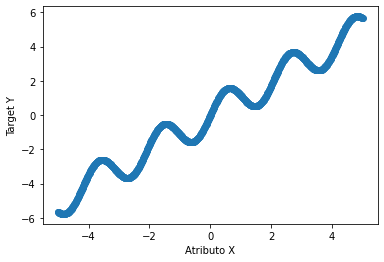

In [2]:
# Generar dataset
X = np.linspace(-5,5,1000).reshape(1000,1)
y_limpia = np.sin(3*X) + X

plt.scatter(X, y_limpia)
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

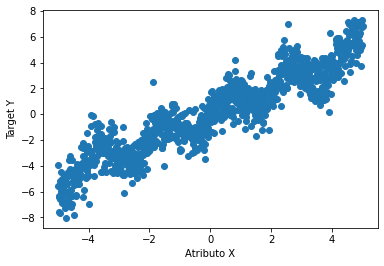

In [3]:
# Agregar ruido para un dataset más real
y_ruido = np.random.normal(size=len(X)).reshape(y_limpia.shape)
y = y_limpia + y_ruido

plt.scatter(X, y)
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

En la etapa siguiente se realiza la división de datos en train + test como se explicó en la unidad I. Los datos de train, a su vez, se dividen en distintos conjuntos con lo que se conoce como validación cruzada.

El método **GridSearchCV** realiza esa validación cruzada automáticamente. Además, este método se utiliza para optimizar los parámetros aplicando todas sus combinaciones posibles. En este caso, el parámetro que optimizar es `max_depth`. Se prueban valores entre 3 y 7 y se elige como óptimo el que mejores resultados tenga en los conjuntos de validación por medio de validación cruzada.

En este caso `max_depth` tiene cinco valores: 3, 4, 5, 6 y 7. Utilizando `GridSearchCV` se ajusta un modelo usando `max_depth=3`, se divide `(X_train,Y_train)` en tres conjuntos, ya que `cv=3`. Se halla la métrica media de validación en esos tres conjuntos, la cual será la métrica de `max_depth=3`. Posteriormente, se utiliza `max_depth=4` y se vuelve a optener la métrica media de validación en esos tres conjuntos. Análogamente para `max_depth=5,6,7`. El valor de `max_depth` que mejor métrica media obtenga es el mejor parámetro.

Posteriormente, el método `Predict(X)` obtiene la predicción utilizando los mejores parámetros calculados con `GridSearchCV`.

In [4]:
# División de datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 5)


In [5]:
# Obtener el mejor parámetro de profundidad del árbol entre e y 7 usando validación cruzada y GridSearchCV
regr = DecisionTreeRegressor()
params = {"max_depth":range(3,7)}
regr_opt = GridSearchCV(regr, params, cv = 3)
regr_opt.fit(X_train, y_train)

print('El mejor estimador es {}'.format(regr_opt.best_estimator_))

y_train_pred = regr_opt.predict(X_train)
y_test_pred = regr_opt.predict(X_test)

print('La R2 en los datos de entrenamiento es: {}'.format(np.round(r2_score(y_train, y_train_pred),2)))
print('La R2 en los datos de test          es: {}'.format(np.round(r2_score(y_test, y_test_pred),2)))

El mejor estimador es DecisionTreeRegressor(max_depth=3)
La R2 en los datos de entrenamiento es: 0.9
La R2 en los datos de test          es: 0.89


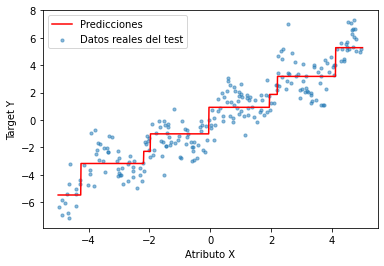

In [9]:
X_fit = np.linspace(-5,5,1000).reshape(1000,1)
y_fit = regr_opt.predict(X_fit)

plt.scatter(X_test, y_test, label = "Datos reales del test", alpha = 0.5, s = 10)
plt.plot(X_fit, y_fit, c = "red", label = "Predicciones")
plt.legend()
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()

En la figura se muestran los datos y el ajuste del modelo de árbol de decisión con el parámetro óptimo `(max_depth=3)`. Como se muestra, ajusta bastante bien a los datos de train y de test. Como no hay casi diferencia entre las métricas, el modelo no está sobreajustado. Si bien este modelo es de los más rápidos, no suele ser de los que mejor rendimiento tienen. Existen otras opciones como los algoritmos de bagging o boosting (que se tratan en esta unidad) que suelen funcionar mejor en la mayoría de problemas.